# Customer Churn Prediction

## Predicting whether a customer will switch telecommunications provider

This project is about predicting whether a customer will switch telecommunications provider, something known as "churning". This is of particular relevance in the world of telecommunications providers because it is a very mature market where most marketing strategies are based on increasing market share (percentage of demand satisfied by our company). To this end, it is essential to study which factors significantly influence customers' decision to switch providers.

The training data set contains 4,250 samples. Each sample contains 19 features and 1 Boolean variable "churn" indicating the class of the sample. The 19 input features and 1 target variable are:

1. "state", string. 2-letter code for the customer's state of residence in the USA.
2. "account_length", numeric. Number of months the customer has been with the current telecommunications provider.
3. "area_code", string="area_code_AAA" where AAA = 3-digit area code.
4. "international_plan", (yes/no). The customer has an international plan.
5. "voice_mail_plan", (yes/no). Customer has a voice mail plan.
6. "number_vmail_messages", numeric. Number of voice mail messages.
7. "total_day_minutes", numeric. Total minutes of calls for the day.
8. "total_day_calls", numeric. Total minutes of calls for the day.
9. "total_day_charge", numeric. Total charge of calls for the day.
10. "total_eve_minutes", numeric. Total minutes of night calls.
11. "total_eve_calls", numeric. Total number of night calls.
12. "total_eve_charge", numeric. Total charge for night calls.
13. "total_night_minutes", numeric. Total minutes of night calls.
14. "total_night_calls", numeric. Total number of night calls.
15. "total_night_charge", numeric. Total charge for night calls.
16. "total_intl_minutes", numeric. Total minutes of international calls.
17. "total_intl_calls", numeric. Total number of international calls.
18. "total_intl_charge", numeric. Total charge for international calls.
number_customer_service_calls", numeric. Number of customer service calls.
20. "churn", (yes/no). Target variable for churn.

In [2]:
import pandas as pd
import numpy as np

!gdown --id 1beF0_Hsl4XEMlgZcT19SFSKvHSPqRuUN

df_raw = pd.read_csv('train.csv')
df_raw.head(5)

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1beF0_Hsl4XEMlgZcT19SFSKvHSPqRuUN
To: /content/train.csv
100% 392k/392k [00:00<00:00, 113MB/s]


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## 1. Data Cleaning

Data cleansing is the process of fixing or removing incorrect, corrupt, misformatted, duplicate or incomplete data within a data set. When multiple data sources are combined, there is a good chance that the data will be duplicated or mislabeled. If the data is incorrect, the results and algorithms are unreliable, even if they appear correct.

In this case, all data are clean. In the case of not being clean, commas would be changed by dots, spaces would be cleared in the data that are lines of text, those data that interest me would be divided by bars, commas, dots, etc. 

In any case, let's check that there are no null values.

In [3]:
df_raw.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## 2. Exploratory Data Analysis

Exploratory data analysis refers to the critical process of conducting initial investigations on data to discover patterns, detect anomalies, test hypotheses and test assumptions with the help of summary statistics and graphical representations.

In this case, our goal is to **predict whether a customer will stay with us or leave**, so we need to see which variables are best for our classification model.

### 2.1. Observation of the dataset and adjustment of variable types

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

We can see that there are integer and decimal numeric variables, as well as categorical variables in string format. In order to continue with the analysis and study the correlations, we have to transform the categorical variables in string format into a numerical coding. 

In [5]:
# Divide the tables according to type

# Numerical type columns
df_numeric = df_raw.drop(['state','area_code', 'international_plan','voice_mail_plan','churn'], axis=1)

# Columns of categorical type with binary categories
df_binary_categoric = df_raw.filter(['international_plan','voice_mail_plan','churn'])
# Transform yes and no into 1s and 0s
df_binary_categoric = pd.get_dummies(df_binary_categoric, drop_first=True)

# Columns of categorical type with non-binary categories
df_nonbinary_categoric = df_raw.filter(['state','area_code'])
# Keep only the code number and transform them into categories
df_nonbinary_categoric['area_code'] = df_nonbinary_categoric['area_code'].str.split('_',expand=True)[2].astype('int')
# Transform each state into a category and get its numeric code
df_nonbinary_categoric['state'] = df_nonbinary_categoric["state"].astype('category').cat.codes

# Join all the subtables to get the final table
df_final = pd.concat([df_numeric, df_binary_categoric, df_nonbinary_categoric], axis=1)

df_final

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes,churn_yes,state,area_code
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,35,415
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,31,415
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0,35,408
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0,36,415
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,0,19,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,0,0,26,415
4246,73,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,0,0,49,408
4247,75,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,0,0,27,408
4248,50,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,1,0,11,408


Again, we check again that there are no null values in case there has been an error during *data wrangling*.

In [6]:
df_raw.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### 2.2. Distribution of variables

Finding the shape of our data set is an important step in gathering relevant information. The shape of the data set shows the distribution of the data. One can also observe characteristics of the data, such as skewness and *gaps*, which can help to learn more about it, as well as to identify trends.

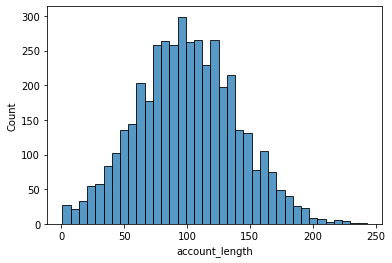

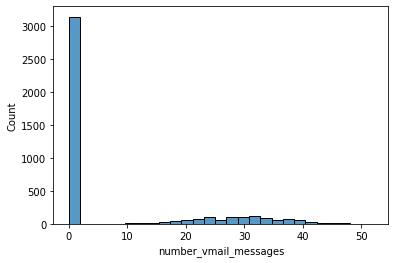

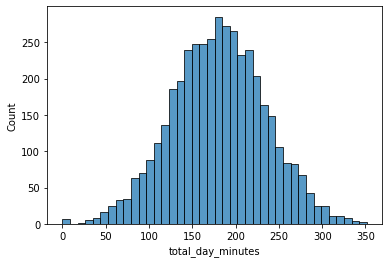

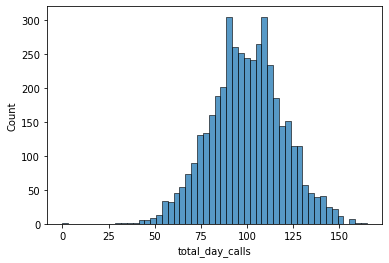

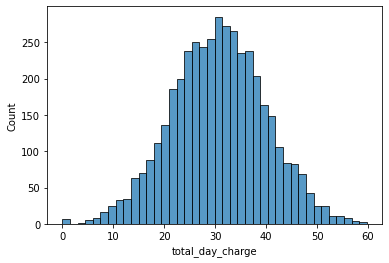

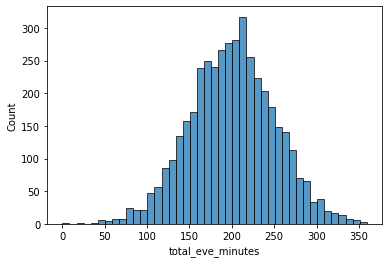

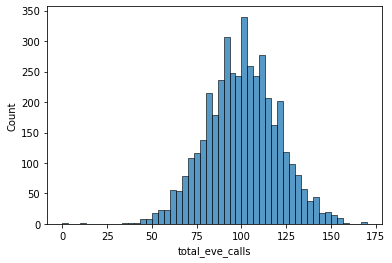

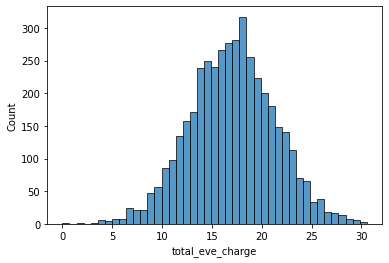

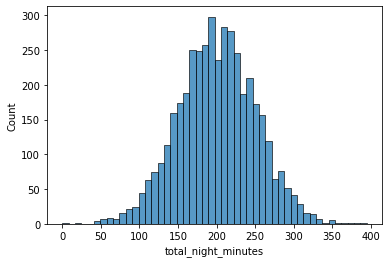

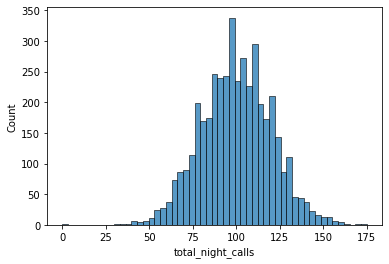

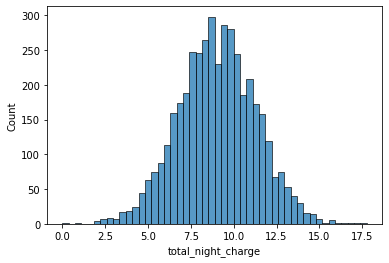

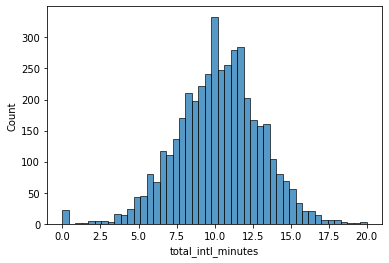

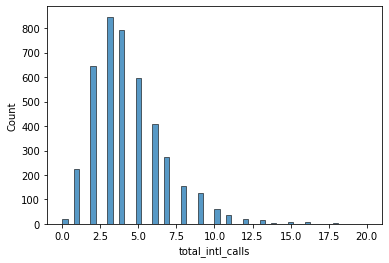

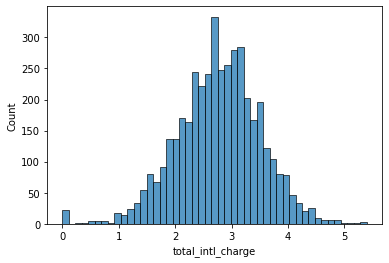

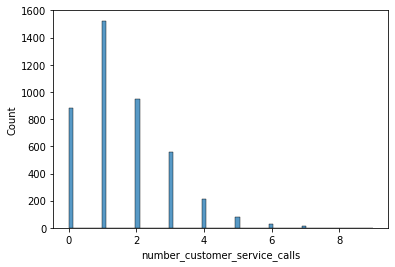

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df_numeric:
    sns.histplot(data = df_numeric, x = column)
    plt.show()


Regarding the numerical variables, we can observe that **most of them follow an approximately normal distribution**. The **exceptions** are number_vmail_messages, since few people tend to leave voice messages; total_day_calls, which shows a bimodal distribution and total_intl_calls and number_customer_service_calls, both showing a clear skewness tending towards the lower values.

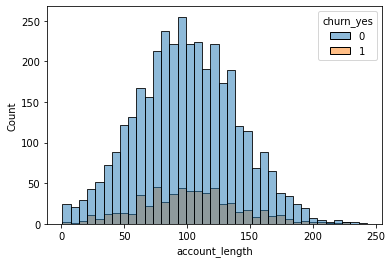

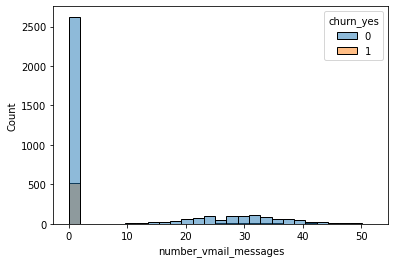

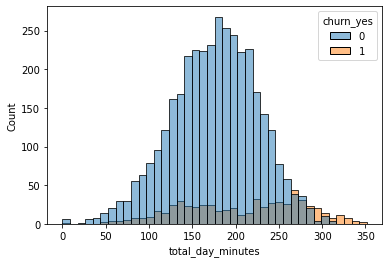

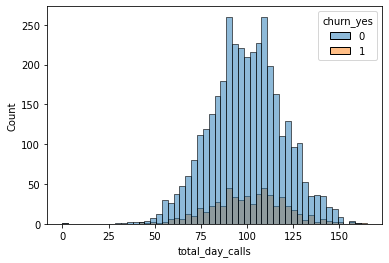

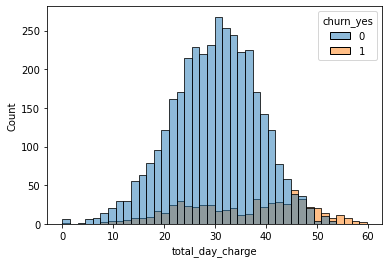

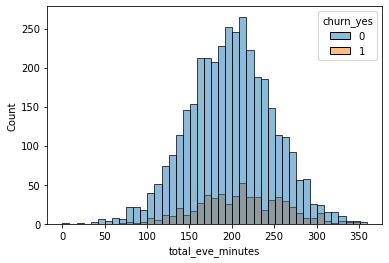

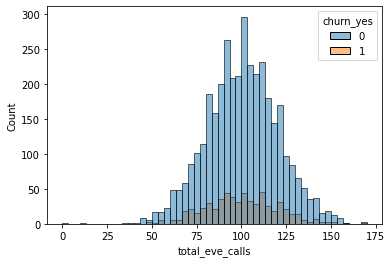

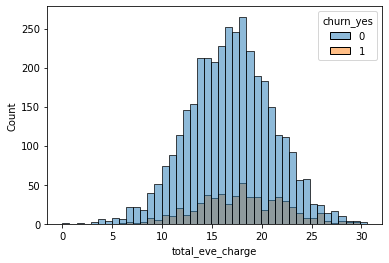

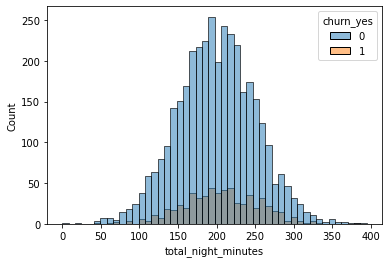

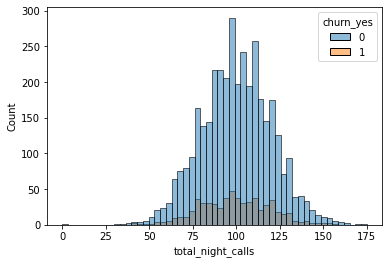

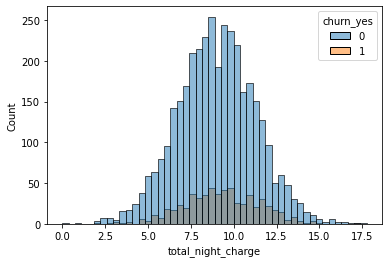

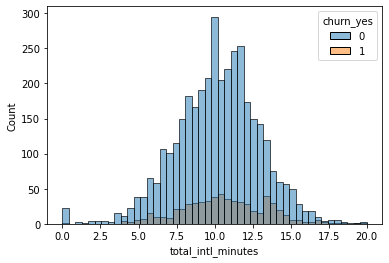

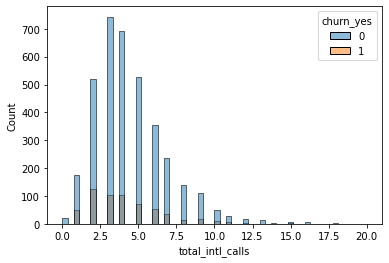

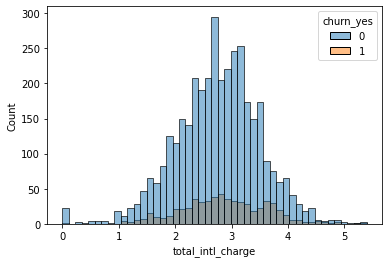

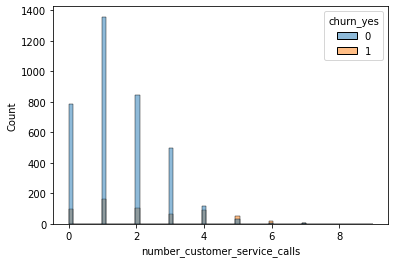

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df_numeric:
    sns.histplot(data = df_final, x = column, hue = 'churn_yes')
    plt.show()

On the other hand, we can see that the distribution of the individual variables takes the same shape for both individuals who stay in the company and individuals who leave. This could be a problem, since it would be complicated to find variables that individually could make a difference. Therefore, it would be necessary to study the variables jointly.

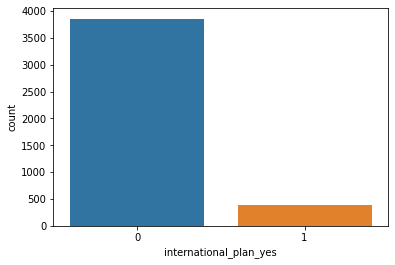

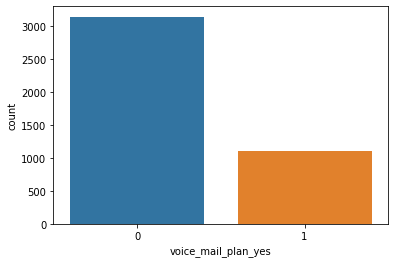

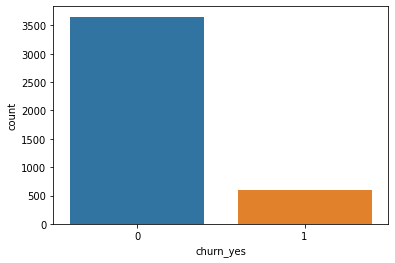


Churning: 14.07%


In [9]:
for column in df_binary_categoric:
    sns.countplot(data = df_binary_categoric, x = column)
    plt.show()

perc_churning = float((df_final['churn_yes'].value_counts()[1]/df_final['churn_yes'].count())*100)
print('\nChurning: %.2f%%'% perc_churning)

In relation to the binary categorical variables, we can observe that most of the customers have not contracted the international plan or the voice messaging plan. This explains what we have seen in the distribution of number_vmail_messages: if they have not contracted the plan, they cannot send messages.

On the other hand, as far as *churning* is concerned, we see that only about **14.07% of customers switch carriers**. This difference in the frequency of cases may then affect the training of the classification model.

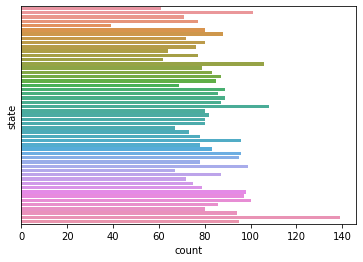

Hay una media de 83.33 casos por estado.



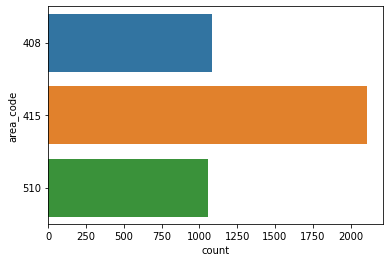

In [10]:
sns.countplot(data = df_nonbinary_categoric, y = 'state')
plt.yticks([])
plt.show()
  
print('Hay una media de %.2f casos por estado.\n' % df_final['state'].value_counts().mean())

sns.countplot(data = df_nonbinary_categoric, y = 'area_code')
plt.show()

Finally, in relation to the non-binary categorical variables, we see that there are states with more records than others, with an **average of approximately 83.3 cases per state**. Also, there are area codes more frequent than others, the most frequent being 415. Again, this could have an impact when training the model.

### 2.3. Correlation of variables

As we begin to understand the data set, we can begin to detect the relationships that exist within it. To do this, we will begin by analyzing the correlation of each of the variables with the *churning*.

In [11]:
df_final.corr()['churn_yes'].sort_values(ascending=False, key = abs)

churn_yes                        1.000000
international_plan_yes           0.259053
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
voice_mail_plan_yes             -0.114643
number_vmail_messages           -0.100347
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
total_night_charge               0.046641
total_intl_calls                -0.034334
account_length                   0.019378
area_code                        0.015964
total_night_calls               -0.012699
total_day_calls                  0.011640
state                            0.007181
total_eve_calls                 -0.006817
Name: churn_yes, dtype: float64

As can be seen, there are variables that are more correlated than others with our target variable. So we will continue the analysis with the better half. Additionally, we will add both state and area code to the variables to be used, since they may be of importance in combination with other variables.

In [12]:
# Create the X set
df_x = df_final.filter(['international_plan_yes', 'number_customer_service_calls', 'total_day_minutes', 'total_day_charge', 'voice_mail_plan_yes', 'number_vmail_messages', 'total_eve_minutes', 'total_eve_charge', 'total_intl_minutes', 'total_intl_charge', 'state', 'area_code'])

# Create the Y set
df_y = df_final.filter(['churn_yes'])

Next, we will study the correlation between the variables of the set x to reduce those that have a clear relationship between them. In this way, we will reduce the noise and improve our classification model.

In [13]:
df_x.corr()

,international_plan_yes,number_customer_service_calls,total_day_minutes,total_day_charge,voice_mail_plan_yes,number_vmail_messages,total_eve_minutes,total_eve_charge,total_intl_minutes,total_intl_charge,state,area_code
international_plan_yes,1.000000,-0.008881,0.040059,0.040061,0.000714,0.004808,0.023484,0.023479,0.023815,0.023799,0.003822,0.027863
number_customer_service_calls,-0.008881,1.000000,-0.002925,-0.002932,-0.021504,-0.015303,-0.010063,-0.010071,-0.013994,-0.014051,-0.020421,0.022880
total_day_minutes,0.040059,-0.002925,1.000000,1.000000,-0.000653,0.002000,-0.013248,-0.013258,-0.021369,-0.021291,0.014263,-0.008200
total_day_charge,0.040061,-0.002932,1.000000,1.000000,-0.000658,0.001994,-0.013247,-0.013257,-0.021374,-0.021296,0.014262,-0.008204
voice_mail_plan_yes,0.000714,-0.021504,-0.000653,-0.000658,1.000000,0.954014,0.011982,0.011989,0.008098,0.008129,-0.034752,-0.008344
number_vmail_messages,0.004808,-0.015303,0.002000,0.001994,0.954014,1.000000,0.010725,0.010736,0.005220,0.005249,-0.030857,-0.007127
total_eve_minutes,0.023484,-0.010063,-0.013248,-0.013247,0.011982,0.010725,1.000000,1.000000,-0.003509,-0.003460,0.001603,0.010856
total_eve_charge,0.023479,-0.010071,-0.013258,-0.013257,0.011989,0.010736,1.000000,1.000000,-0.003512,-0.003463,0.001603,0.010870
total_intl_minutes,0.023815,-0.013994,-0.021369,-0.021374,0.008098,0.005220,-0.003509,-0.003512,1.000000,0.999993,-0.010260,-0.006417
total_intl_charge,0.023799,-0.014051,-0.021291,-0.021296,0.008129,0.005249,-0.003460,-0.003463,0.999993,1.000000,-0.010284,-0.006514


As can be seen, the variables total_day_minutes and total_day_charge are highly correlated, which makes sense, and the same is true for total_eve_minutes and total_eve_charge, as well as for total_intl_minutes and total_intl_charge. On the other hand, we see that voice_mail_plan_yes and number_vmail_messages are also highly correlated, since if you don't have it contracted, you can't send voice messages.

Therefore, we eliminate from the X set the recurring variables:

In [14]:
df_x = df_x.drop(['total_day_minutes','total_eve_minutes', 'total_intl_minutes','voice_mail_plan_yes'], axis=1)

Finally, before we start creating and training the classification models, we will create a new **column that we can use to measure the *performance* of our models**. In this case, it will be a column that adds up the **customer charges for all their calls**. Thus, we will be able to know how much money is at stake if the customer leaves with another company or, in other words, the money we can potentially keep if we convince a customer who wants to leave to stay with our company.

In [15]:
df_x['total_charge'] = (df_final['total_day_charge'] + df_final['total_eve_charge'] + df_final['total_intl_charge'] + df_final['total_night_charge'])
df_x

,international_plan_yes,number_customer_service_calls,total_day_charge,number_vmail_messages,total_eve_charge,total_intl_charge,state,area_code,total_charge
0,0,1,27.47,26,16.62,3.70,35,415,59.24
1,0,0,41.38,0,10.30,3.29,31,415,62.29
2,1,2,50.90,0,5.26,1.78,35,408,66.80
3,1,3,28.34,0,12.61,2.73,36,415,52.09
4,0,3,37.09,24,29.62,2.03,19,510,78.31
...,...,...,...,...,...,...,...,...,...
4245,0,0,32.01,0,20.72,2.78,26,415,65.13
4246,0,3,30.24,0,11.15,3.11,49,408,52.88
4247,0,1,29.02,0,16.41,1.86,27,408,53.10
4248,0,2,40.07,40,18.96,2.67,11,408,75.09


## 3. Classification Models

1. Select several classifiers.
2. Train the classifiers and measure their *performance*.
3. Adjust the different parameters to try to improve them.
4. Compare the *performance* metrics between classifiers.

### Classifier #1 - k-Nearest Neighbors

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# This X set is reduced, since it was found that without these variables 
# the models performed better. It makes sense given that the correlation 
# was very small. Still, it was worth a try.

new_df_x = df_x.drop(['state', 'area_code'], axis=1)

# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(new_df_x, df_y, test_size=0.2, random_state=0, stratify=df_y)

# Create the classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
clf.fit(x_train, y_train.values.ravel())

# Create a confussion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

# Classification report
target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

# We calculate the amount of money that could not be lost if churning were potentially prevented.
# Total number of samples in the test
a = x_test.total_charge
# Number of true positives (No churn = 0, Churn = 1)
ind = (np.array(y_pred) == 1) & (y_test.values.reshape(850) == 1)
amount_detected = np.sum(a[ind]) 
# Actual total amount of churning
ind = (y_test.values.reshape(850) == 1)
amount_total = np.sum( a[ ind ] )

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

Confussion Matrix ------------------
[[722   8]
 [ 56  64]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.9280205655526992, 'recall': 0.989041095890411, 'f1-score': 0.9575596816976127, 'support': 730}: 
Class 1 (Churning) {'precision': 0.8888888888888888, 'recall': 0.5333333333333333, 'f1-score': 0.6666666666666667, 'support': 120}: 

Amount ------------------ 
Potentially Retrieved Money = 4743.67 
Lost Money = 7968.37 
Success Percentage = 59.53%



### Classifier #2 - Bagging with k-Nearest Neighbors

In [17]:
from sklearn.ensemble import BaggingClassifier

x_train, x_test, y_train, y_test = train_test_split(new_df_x, df_y, test_size=0.2, random_state=0, stratify=df_y)

clf = BaggingClassifier(KNeighborsClassifier(),
                        n_estimators=20,
                        max_samples=0.95, 
                        max_features=0.70, 
                        random_state=0)

clf.fit(x_train, y_train.values.ravel())

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

a = x_test.total_charge
ind = (np.array(y_pred) == 1) & (y_test.values.reshape(850) == 1)
amount_detected = np.sum(a[ind]) 
ind = (y_test.values.reshape(850) == 1)
amount_total = np.sum( a[ ind ] ) 

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

Confussion Matrix ------------------
[[725   5]
 [ 61  59]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.9223918575063613, 'recall': 0.9931506849315068, 'f1-score': 0.9564643799472295, 'support': 730}: 
Class 1 (Churning) {'precision': 0.921875, 'recall': 0.49166666666666664, 'f1-score': 0.6413043478260869, 'support': 120}: 

Amount ------------------ 
Potentially Retrieved Money = 4438.65 
Lost Money = 7968.37 
Success Percentage = 55.70%



### Classifier #3 - Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(new_df_x, df_y, test_size=0.3, random_state=0, stratify=df_y)

clf = DecisionTreeClassifier(max_leaf_nodes=50, 
                             max_depth=15, 
                             min_samples_split=7, 
                             max_features=7, 
                             splitter='best',
                             criterion='entropy',
                             random_state = 0)

# IMPORTANT ANNOTATION!!!
# The classifier was optimized by brute force using for-loops with each of the 
# parameters and selecting the combination that maximized the Success Percentage.

clf.fit(x_train, y_train.values.ravel())

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

a = x_test.total_charge
ind = (np.array(y_pred) == 1) & (y_test.values.reshape(1275) == 1)
amount_detected = np.sum(a[ind]) 
ind = (y_test.values.reshape(1275) == 1)
amount_total = np.sum( a[ ind ] ) 

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

Confussion Matrix ------------------
[[1076   20]
 [  38  141]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.9658886894075404, 'recall': 0.9817518248175182, 'f1-score': 0.9737556561085973, 'support': 1096}: 
Class 1 (Churning) {'precision': 0.8757763975155279, 'recall': 0.7877094972067039, 'f1-score': 0.8294117647058822, 'support': 179}: 

Amount ------------------ 
Potentially Retrieved Money = 9548.10 
Lost Money = 11765.60 
Success Percentage = 81.15%



### Classifier #4 - Bagging with Decision Trees

In [19]:
x_train, x_test, y_train, y_test = train_test_split(new_df_x, df_y, test_size=0.2, random_state=0, stratify=df_y)

clf = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=50, 
                                               max_depth=15, 
                                               min_samples_split=7, 
                                               max_features=0.9, 
                                               splitter='best',
                                               criterion='entropy'),
                        n_estimators=50,
                        max_samples=0.9, 
                        max_features=0.9, 
                        random_state=0)

clf.fit(x_train, y_train.values.ravel())

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

a = x_test.total_charge
ind = (np.array(y_pred) == 1) & (y_test.values.reshape(len(y_test)) == 1)
amount_detected = np.sum(a[ind]) 
ind = (y_test.values.reshape(len(y_test)) == 1)
amount_total = np.sum( a[ ind ] ) 

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

Confussion Matrix ------------------
[[730   0]
 [ 29  91]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.9617918313570487, 'recall': 1.0, 'f1-score': 0.9805238415043652, 'support': 730}: 
Class 1 (Churning) {'precision': 1.0, 'recall': 0.7583333333333333, 'f1-score': 0.8625592417061612, 'support': 120}: 

Amount ------------------ 
Potentially Retrieved Money = 6203.97 
Lost Money = 7968.37 
Success Percentage = 77.86%



### Classifier #5 - Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(new_df_x, df_y, test_size=0.2, random_state=0, stratify=df_y)

clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=30,
                             max_leaf_nodes=15,
                             max_features='auto',
                             random_state=0)

clf.fit(x_train, y_train.values.ravel())

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

a = x_test.total_charge
ind = (np.array(y_pred) == 1) & (y_test.values.reshape(len(y_test)) == 1)
amount_detected = np.sum(a[ind]) 
ind = (y_test.values.reshape(len(y_test)) == 1)
amount_total = np.sum( a[ ind ] ) 

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

Confussion Matrix ------------------
[[729   1]
 [ 29  91]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.9617414248021108, 'recall': 0.9986301369863013, 'f1-score': 0.9798387096774194, 'support': 730}: 
Class 1 (Churning) {'precision': 0.9891304347826086, 'recall': 0.7583333333333333, 'f1-score': 0.8584905660377358, 'support': 120}: 

Amount ------------------ 
Potentially Retrieved Money = 6203.97 
Lost Money = 7968.37 
Success Percentage = 77.86%



### Classifier #6 - Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0, stratify=df_y)

clf = GaussianNB(priors = [1- 0.1407, 0.1407])

clf.fit(x_train, y_train.values.ravel())

print('Prior Probabilities ------------------')
print( clf.class_prior_ )

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('\nConfussion Matrix ------------------')
print(cm)

target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

a = x_test.total_charge
ind = (np.array(y_pred) == 1) & (y_test.values.reshape(1275) == 1)
amount_detected = np.sum(a[ind]) 
ind = (y_test.values.reshape(1275) == 1)
amount_total = np.sum( a[ ind ] ) 

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

Prior Probabilities ------------------
[0.8593 0.1407]

Confussion Matrix ------------------
[[1001   95]
 [  83   96]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.9234317343173432, 'recall': 0.9133211678832117, 'f1-score': 0.918348623853211, 'support': 1096}: 
Class 1 (Churning) {'precision': 0.5026178010471204, 'recall': 0.5363128491620112, 'f1-score': 0.518918918918919, 'support': 179}: 

Amount ------------------ 
Potentially Retrieved Money = 6487.41 
Lost Money = 11765.60 
Success Percentage = 55.14%



### Classifier #7 - Fully Connected Neural Network (FCN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23,802
Trainable params: 23,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
47/47 [==============================] -

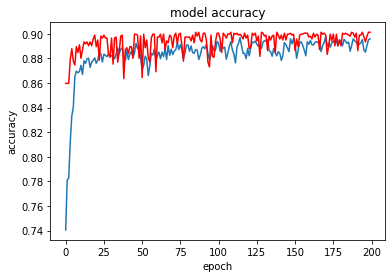

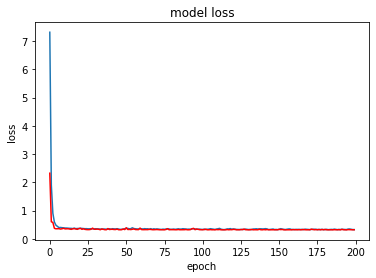

40/40 [==============================] - 0s 2ms/step

Confussion Matrix ------------------
[[   1 1095]
 [  54  125]]

Classification report ------------------
Class 0 (No Churning) {'precision': 0.01818181818181818, 'recall': 0.0009124087591240876, 'f1-score': 0.001737619461337967, 'support': 1096}: 
Class 1 (Churning) {'precision': 0.10245901639344263, 'recall': 0.6983240223463687, 'f1-score': 0.17869907076483202, 'support': 179}: 

Amount ------------------ 
Potentially Retrieved Money = 7477.55 
Lost Money = 11765.60 
Success Percentage = 63.55%



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

# Define and transform the variables to a valid format for the neural network.
x = df_x.values 
y = df_y.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=df_y)

# Create the NN
model = Sequential()
model.add( Dense(100, activation='relu', input_shape=(9,)) ) # Primera cama con 100 neuronas y función de activación ReLU
model.add( Dense(150, activation='relu') ) # Capa oculta con 150 neuronas y función de activación ReLU
model.add( Dropout(0.3) )
model.add( Dense(50, activation='relu') ) # Capa oculta con 50 neuronas y función de activación ReLU
model.add( Dense(2, activation='softmax') ) # Capa de salida con 2 neuronas (una por categoría) y función de activación softmax

# Create a summary showing the layers, their shapes and parameters.
model.summary()

# Configure the optimizer, loss function and model metrics
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model, using a batch size of 64 and 200 epochs.
history = model.fit(
    x_train,
    to_categorical(y_train),
    epochs=200,
    batch_size=64,
    validation_data=(x_test, to_categorical(y_test)))

# ACCURACY evolution chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# LOSS evolution chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Confussion Matrix
y_pred = pd.DataFrame(model.predict(x_test).round(0).astype('int'))[0]
cm = confusion_matrix(y_test, y_pred)

print('\nConfussion Matrix ------------------')
print(cm)

# Classification Report
target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Class 0 (No Churning) %s: ' % report['0'])
print('Class 1 (Churning) %s: ' % report['1'])

a = x_test[:,-1]
ind = (y_pred == 1) & (y_test.reshape(1275) == 1)
amount_detected = np.sum(a[ind]) 
ind = (y_test.reshape(1275) == 1)
amount_total = np.sum( a[ ind ] ) 

print('\nAmount ------------------ \nPotentially Retrieved Money = %.2f \nLost Money = %.2f \nSuccess Percentage = %.2f%%\n' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

## Summary Table

In [25]:
data = {'Classifier': ['NN', 'BNN', 'DT', 'BDT', 'RF', 'NB', 'FCN'], 
        '% Suc. Initial': [49.81, 46.23, 79.76, 78.75, 78.11, 55.14, 24.76], 
        '% Suc. Optimal': [59.53, 55.70, 81.15, 77.86, 77.86, 55.14, 63.55], 
        'FP': [8, 5, 20, 0, 1, 95, 1095],
        'FN': [56, 61, 38, 29, 29, 83, 54],
        'Churning Precision': [0.88, 0.92, 0.87, 1.0, 0.98, 0.50, 0.1],
        'Churning Recall': [0.53, 0.49, 0.78, 0.75, 0.75, 0.53, 0.69]}

res_tab = pd.DataFrame.from_dict(data)
res_tab

,Classifier,% Suc. Initial,% Suc. Optimal,FP,FN,Churning Precision,Churning Recall
0,NN,49.81,59.53,8,56,0.88,0.53
1,BNN,46.23,55.70,5,61,0.92,0.49
2,DT,79.76,81.15,20,38,0.87,0.78
3,BDT,78.75,77.86,0,29,1.00,0.75
4,RF,78.11,77.86,1,29,0.98,0.75
5,NB,55.14,55.14,95,83,0.50,0.53
6,FCN,24.76,63.55,1095,54,0.10,0.69


## Final Conclusions

As can be seen, each model has its pros and cons. Thus:

- The model with **highest success rate** (percentage of money potentially recovered if a marketing strategy is performed to retain the possibly departing customer) is the **Decision Tree Simple**, with 81.15%. The next best would be the Bagging Decision Tree and Random Forest, both with 77.86%.

- The models with **fewest false positives** (customers to whom a marketing strategy would be applied but who would still have stayed with us) are the **Bagging Decision Tree and Random Forest**, with 0-1 FP.

- The models with **fewest false negatives** (customers to whom we would not apply a marketing strategy and therefore lose because they want to leave) are also the **Bagging Decision Tree and Random Forest**, both with 29 FN.

Therefore, the finalist candidates would be Bagging Decision Tree and Random Forest, but considering the simplicity of the model and the short computation time of the results, the **best model for this project would be Bagging Decision Tree**.

Finally, and by way of reflection, I would like to point out that **the neural network has not been one of the best models**, in fact it has been one of the worst. We tend to think that neural networks always work better than other classifiers, but in many cases reaching the optimal configuration is very complicated. In our case, the network easily reached the overfitting, classifying all the inputs as churning, but finally we managed to obtain a more balanced model. In any case, other simpler and faster models far outperformed the results obtained by neural networks.

Likewise, despite the fact that at the beginning we decided, by intuition, to leave **state and area code** in the set of independent variables, it was found that they not only had no correlation with the dependent variable (churning), but **in many occasions they worsened the models**. In any case, if we had a larger data set at our disposal, it would be a good idea to segment the data by states and make individual models for each of them or for the different areas of the US (north, south, east and west). In fact, we did the experiment and the percentages were increasing, although we decided not to pursue the idea because there was little data per state and the results might not be representative. 

In short, **this project has been of great help to us to put into practice everything we have learned** in the subject Classification Models and, above all, to structure in our heads the routine procedures related to Data Science and Artificial Intelligence.